# 혼동행렬(Confusion Matrix)

- Classification 머신러닝 모델이 제대로 작동을 했는지 혼동을 했는지 알아볼 수 있는 행렬

In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
sns.set(font_scale=2)

### 1. Basic confusion matrix

- seaborn의 heatmap은 confusion matrix를 시각화 하는 함수
- 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자를 나타냄

In [50]:
arr = [[5,0,0,0], # when input was A, prediction was all A
        [0,10,0,0], # when input was B, prediction was all B
        [0,0,15,0], # when input was C, prediction was all C
        [0,0,0,5]]  # when input was D, prediction was all D
df_cm = DataFrame(arr, index=[i for i in "ABCD"],
                 columns= [i for i in "ABCD"])
df_cm

,A,B,C,D
A,5,0,0,0
B,0,10,0,0
C,0,0,15,0
D,0,0,0,5


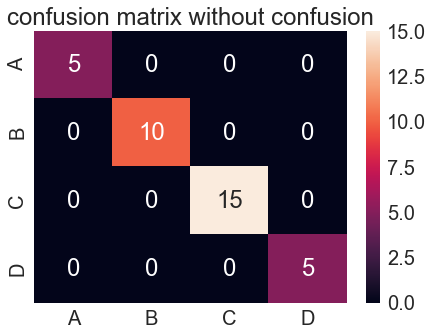

In [51]:
plt .figure(figsize = (7,5))
plt.title('confusion matrix without confusion')
sns.heatmap(df_cm, annot=True)

### 2. Confusion matrix with confusion

#### 1) normalization 하지 않은 confusion matrix

- normalization 하지 않은 confusion matrix의 문제점
    - test input의 분포를 모르기 때문에 어떤 알파벳에 효율적인지 말할 수 없음

In [52]:
arr2 = [[9,1,0,0],  
        [1,15,3,1],
        [5,0,24,1],
        [0,4,1,15]]
df_cm2 = DataFrame(arr2, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
df_cm2

,A,B,C,D
A,9,1,0,0
B,1,15,3,1
C,5,0,24,1
D,0,4,1,15


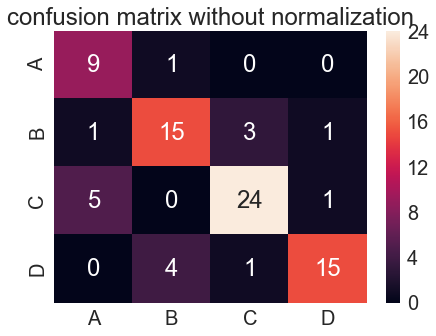

In [53]:
plt.figure(figsize=(7,5))
plt.title('confusion matrix without normalization')
sns.heatmap(df_cm2, annot=True)

#### 2) normalization 한 confusion matrix

In [54]:
import numpy as np
from numpy import linalg as LA

In [55]:
total = np.sum(arr2, axis=1)
print(total)

[10 20 30 20]


In [56]:
arr3 = arr2/total[:,None]
arr3

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])

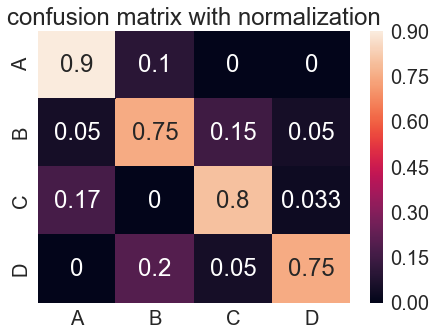

In [57]:
df_cm3 = DataFrame(arr3, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (7,5))
plt.title('confusion matrix with normalization')
sns.heatmap(df_cm3, annot=True)

** 참고
- github:https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/confusion_matrix/confusion_matrix.ipynb

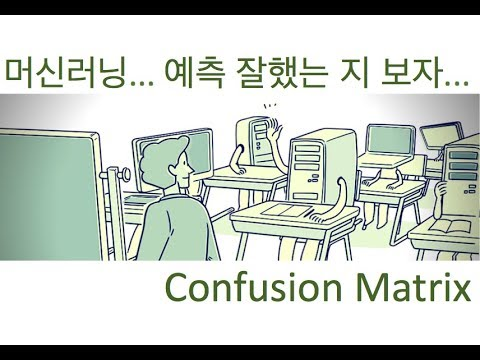

In [58]:
from IPython.display import YouTubeVideo
YouTubeVideo('M0GBAzFV9_A')

# 다중 분류 모델 성능 측정(accuracy, f1 score, precision, recall)

### 1. 성능 지표(Performance measures)

- Accuracy: 가장 많이 사용되는 지표, data가 balance할 때 효과적

- F1 score: recall과 precision의 값을 가지고 조합평균(harmonic mean)을 낸 값
    - Recall(confusion matrix에서 colum 방향): 재현율, 클래스가 주어졌을 때 classifier가 잘 예측을 하는가?
    - Precision(confusion matrix에서 row 방향): 정밀도, classfier가 예측한 값들 중에서 정말로 예측한 값이 맞는가?

#### 1) 개념 정리

- TP(true positive): true를 ture로 잘 예측한 것
- TN(true negative): false를 false로 잘 예측한 것
- FP(false positive):  false를 true로 잘 못 예측한 것
- FN(false negative): true를  false로 잘 못 예측한 것

### 2. 예시: Model 1과 Model 2 중 어느 것을 선택해야 하는가?

#### 1) Balanced data

- Model 1

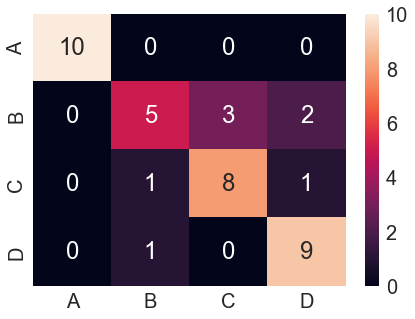

In [59]:
arr4 = [[10,0,0,0],
       [0,5,3,2],
       [0,1,8,1],
       [0,1,0,9]]
df_cm4 = DataFrame(arr4, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm4, annot=True)

- Model 2

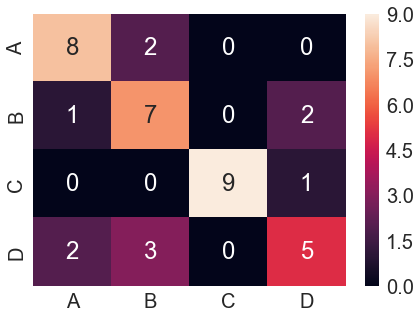

In [60]:
arr5 = [[8,2,0,0],
       [1,7,0,2],
       [0,0,9,1],
       [2,3,0,5]]
df_cm5 = DataFrame(arr5, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm5, annot=True)

#### 2) Imbalanced data

- Model 1

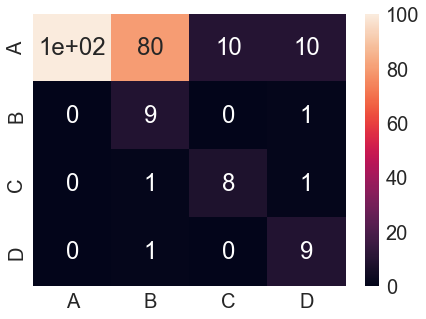

In [61]:
arr6 = [[100,80,10,10],
       [0,9,0,1],
       [0,1,8,1],
       [0,1,0,9]]
df_cm6 = DataFrame(arr6, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm6, annot=True)

- Model 2

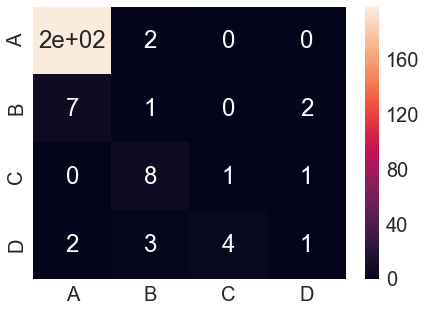

In [65]:
arr7 = [[198,2,0,0],
       [7,1,0,2],
       [0,8,1,1],
       [2,3,4,1]]
df_cm7 = DataFrame(arr7, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm7, annot=True)